In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/CMSC6950/PROJECT"
!ls

Mounted at /content/drive
/content/drive/My Drive/CMSC6950/PROJECT
CMSC_PROJECT.ipynb		    MedianDisparity.png  MeidanDisparity.pdf	stats.ipynb
data_use_country_scores_annual.csv  MedianDisparity.svg  results_completed.csv


# Finding Median, average and Year over Year grwoth

In [2]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import median
import matplotlib.pyplot as plt
from collections import defaultdict


In [3]:
#  Create median from chunks
country_counts = {}
papers_per_year_by_country = {}
meadian_by_country = {}
median_by_year = {}

def create_year_by(chunk):
    global papers_per_year_by_country
    chunk = chunk.dropna()
    for year, journal, countries in zip(chunk['year'], chunk['journal'], chunk['countries']):
        # Ensure year is a string for consistency
        year = str(year)
        countries = ast.literal_eval(countries)
        # Initialize the year entry if it doesn't exist
        if year not in papers_per_year_by_country:
            papers_per_year_by_country[year] = {}

        # Iterate over countries, skipping 'nf'
        for country in countries:
            if country == 'nf':
                continue

            # Initialize the country entry if it doesn't exist
            if country in papers_per_year_by_country[year]:
                papers_per_year_by_country[year][country] += 1
            else:
                papers_per_year_by_country[year][country] = 1


In [4]:
chunk_size = 10000
#  read csv
data = pd.read_csv('./results_completed.csv', usecols=['year', 'journal', 'countries'], chunksize=chunk_size)

In [5]:
for chunk in data:
    create_year_by(chunk)

In [6]:

# Calculate the median for each year
for year, country_counts in papers_per_year_by_country.items():
    counts = list(country_counts.values())
    if counts:  # Ensure there are counts to calculate the median
        median_by_year[year] = np.median(counts)

# Print the results
for year, med in median_by_year.items():
    print(f"Year: {year}, Median: {med}")


Year: 2014, Median: 16.0
Year: 2018, Median: 13.0
Year: 2007, Median: 7.0
Year: 2009, Median: 8.0
Year: 2016, Median: 16.0
Year: 2008, Median: 7.0
Year: 2004, Median: 6.5
Year: 2006, Median: 7.0
Year: 2011, Median: 11.0
Year: 2015, Median: 16.0
Year: 2019, Median: 12.5
Year: 2001, Median: 4.0
Year: 2005, Median: 5.0
Year: 2012, Median: 11.0
Year: 2010, Median: 8.0
Year: 2003, Median: 4.5
Year: 2017, Median: 15.0
Year: 2013, Median: 14.5
Year: 2002, Median: 4.0
Year: 2020, Median: 4.0


In [7]:
# Create a dictionary to store top performers for each year
top_performers_by_year = {}
years = []
runner_ups_by_year = []

# Find the top performer for each year
for year, country_counts in papers_per_year_by_country.items():
    top_country = max(country_counts, key=country_counts.get)
    top_performers_by_year[year] = (top_country, country_counts[top_country])

# Compare top performers with the median for each year
comparison_results = []

for year in top_performers_by_year:
    top_country, top_count = top_performers_by_year[year]
    median = median_by_year.get(year, None)

    # Ensure the median exists for the year
    if median is not None:
        comparison_results.append({
            "Year": year,
            "Top Country": top_country,
            "Top Country Count": top_count,
            "Median": median,
            "Difference from Median": top_count - median,
            "Percentage Difference": ((top_count-median)/median)*100
        })

# Create a DataFrame for the comparison results
df_comparison = pd.DataFrame(comparison_results).sort_values(by="Year")
# Display the comparison results
print(df_comparison.to_markdown())


|    |   Year | Top Country   |   Top Country Count |   Median |   Difference from Median |   Percentage Difference |
|---:|-------:|:--------------|--------------------:|---------:|-------------------------:|------------------------:|
| 11 |   2001 | USA           |                 229 |      4   |                    225   |                 5625    |
| 18 |   2002 | USA           |                 264 |      4   |                    260   |                 6500    |
| 15 |   2003 | USA           |                 282 |      4.5 |                    277.5 |                 6166.67 |
|  6 |   2004 | USA           |                 433 |      6.5 |                    426.5 |                 6561.54 |
| 12 |   2005 | USA           |                 431 |      5   |                    426   |                 8520    |
|  7 |   2006 | USA           |                 458 |      7   |                    451   |                 6442.86 |
|  2 |   2007 | USA           |                 510 |   

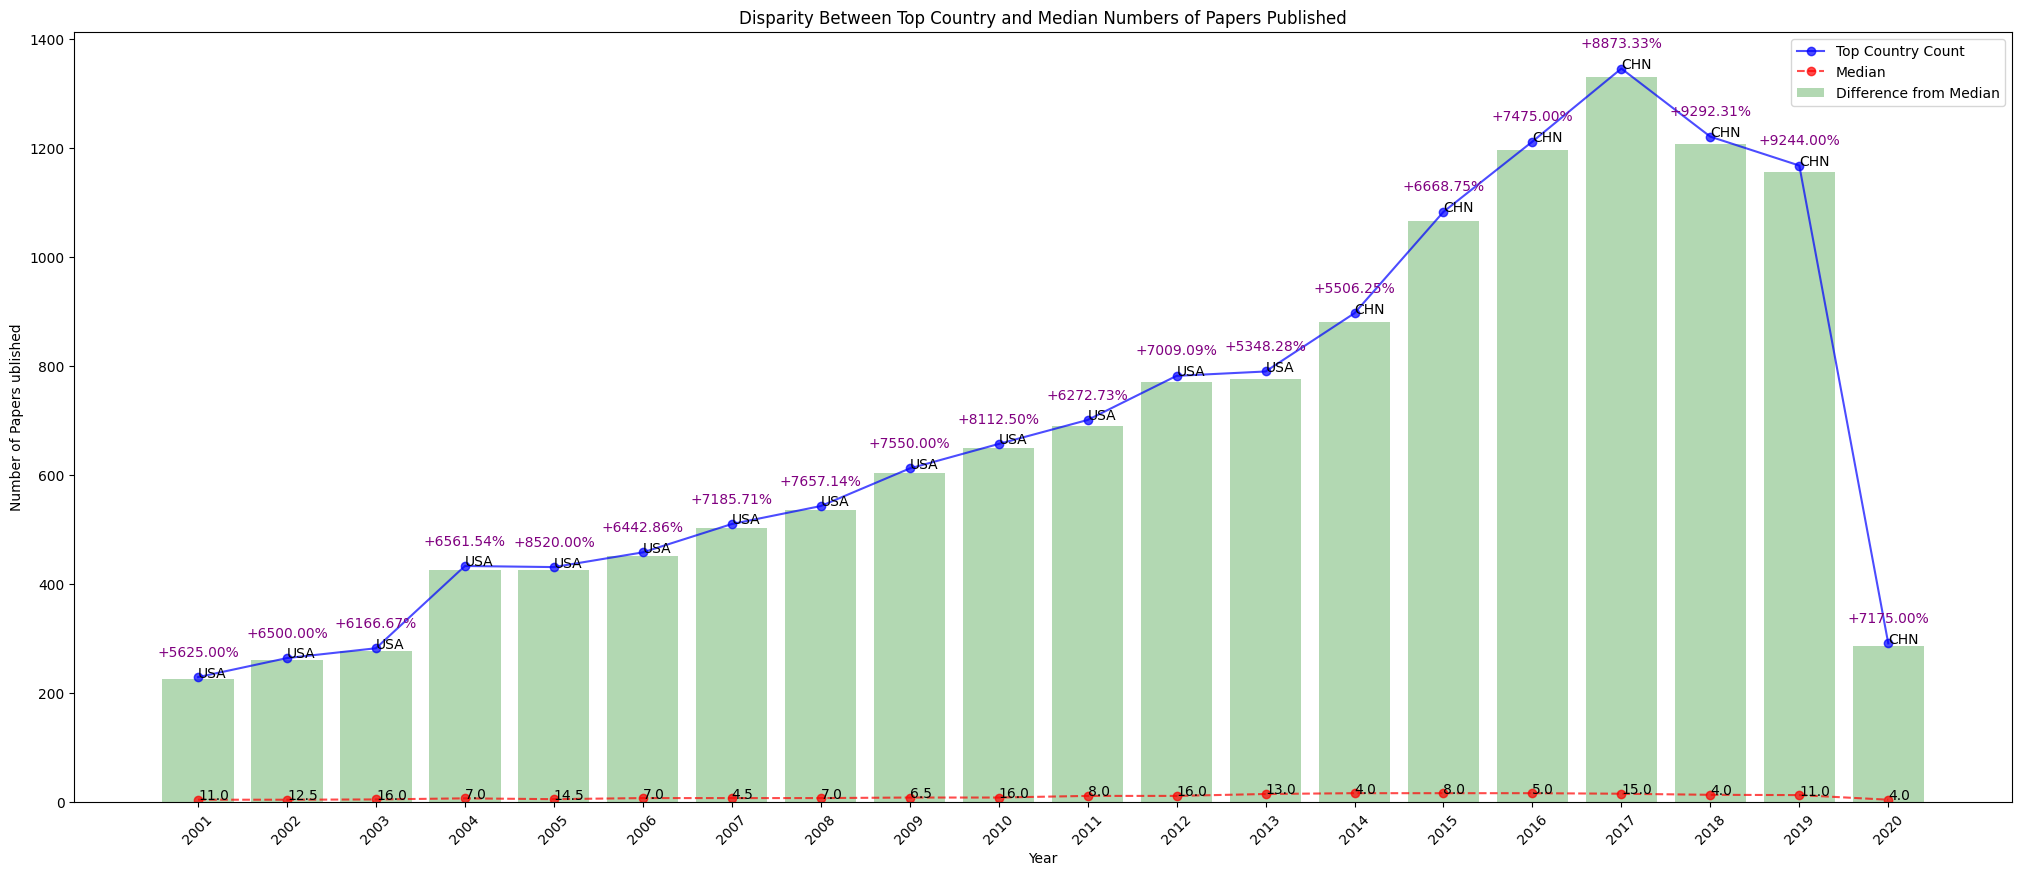

In [17]:
# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))

year = df_comparison['Year']
top_country_count = df_comparison['Top Country Count']
median = df_comparison['Median']

# Plot the Top Country Count and Median
ax.plot(year, top_country_count, label='Top Country Count', marker='o', linestyle='-', color='b', alpha=0.7)
ax.plot(year, median, label='Median', marker='o', linestyle='--', color='r', alpha=0.7)

for i, label in enumerate(median):
    ax.annotate(label, (year[i],  median[i]))
    ax.annotate(df_comparison['Top Country'][i], (year[i],  top_country_count[i]))
    pdiff = df_comparison['Percentage Difference'][i]
    ax.annotate(f'+{pdiff:.2f}%', (year[i], top_country_count[i]), textcoords="offset points", xytext=(0, 15), ha='center', color='purple')

# Highlight the difference (bar graph)
ax.bar(year, df_comparison['Difference from Median'], label='Difference from Median', color='g', alpha=0.3)

# Labeling
ax.set_title('Disparity Between Top Country and Median Numbers of Papers Published')
# ax.xlabel('Year')
ax.set_ylabel('Number of Papers ublished')
ax.set_xlabel('Year')
ax.tick_params(axis='x', rotation=45,  which='major')
ax.legend()
plt.savefig('MeidanDisparity.pdf')
plt.savefig('MedianDisparity.png')
plt.savefig('MedianDisparity.svg')
plt.show()

# China's Research Boom and the COVID-19 Disruption

The dataset providees an interesting look at the global distribution of research output over a span of nearly two decades.

### China's Rise to Dominance (Post-2014)

- **From 2001 to 2013**, the United States consistently published more research papers than any other country, peaking at 790 papers in 2013. During this period, the difference in output between U.S. and other countries remained substantial, with the U.S. having the heighest counts year after year.

- **2014 - The Shift**: In 2014, China overtakes the U.S. for the first time, with 897 papers publised compared to the U.S. . This markks the beginning of a clear shift in global research dominance. The differeence between the U.S. and China continues to grow in the following years.

- **2015-2020: China's Contined Growth**: By 2015, China's output rises sharply to 1083 papers, overtaking the U.S. . The Gap widens further in 2016 (1,212 papers), 2017 (1,346 papers), and peaks in 2018 with 1,221 papers. The rapid growth in Chaina's research output highlights a clear thrend: China has increasingly become a global research leader, with signigicant investments in science and technology, a investments in science and technology, a growing research community, and a focus on higher education and innovation.

- **China's Reseach Growth**: China's percentage difference from the median (Percentage increase from the median) has consistently been high, especially post-2014. this indicates thath China has not only produceed more papers but has incresingly outpaced the global median, with a higher concentration of research output compared to other nations.

### **Imapct of COVID-19(2020)**

- **2020: A Drastic Decline**: The year 2020 standsd out as an anomaly. while the dataset shows China as still having the higheest count (291 papers), there is a dramatic drop in the total numbers of published papers from 2019 (1168 papers). This suggests a significant impact from the COVID-19 pandamic, which disrupted the global research ecosystem. Travel restrictions, lab clousers, and social distancing measures likely hindered researchers ability to conduct experiments, collaborate internationally, and publish their findings.

- **Percentage Drop**: The percentage difference from the mediann for China drops dramatically in 2020, reflecting a sharp deviation from the prior years' trends. This sharp decrease may be reflective of the broader global slowdown in academic and research activities, as institutions and researchers worldwide adjusted to realities of the pandemic.

- **Global Imapct**: The decline in research output in 2020 is not unique to China but is evident accross many countries. The world saw a shift in priorites as pandemic became the new norm. However, the magnitude of the decreasee in publishedd papers underscores the fragility of research prductivity in an unexpected global crises.

### **Other Interesting Insights**
- **Median Values**: The median numbers of papers published fluctuates across the yearrs, reflecting shifts in global research output. The median starts at alower value in earlier years but gradually increases as the overall research ouput grows globally.

In [9]:
data = []
for year, country_counts in papers_per_year_by_country.items():
    for country, count in country_counts.items():
        data.append({"Year": year, "Country": country, "Count": count})

# Create DataFrame
df_papers_per_year_by_country = pd.DataFrame(data).sort_values(['Year','Count'], ascending=[True, False])

# Display the DataFrame
print(df_papers_per_year_by_country.to_markdown())

|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 2111 |   2001 | USA       |     229 |
| 2108 |   2001 | JPN       |      94 |
| 2114 |   2001 | GBR       |      72 |
| 2120 |   2001 | AUS       |      72 |
| 2143 |   2001 | CAN       |      66 |
| 2134 |   2001 | DEU       |      64 |
| 2125 |   2001 | IND       |      46 |
| 2142 |   2001 | CHN       |      46 |
| 2158 |   2001 | BRA       |      43 |
| 2113 |   2001 | NLD       |      42 |
| 2146 |   2001 | FRA       |      38 |
| 2110 |   2001 | ESP       |      37 |
| 2130 |   2001 | MEX       |      36 |
| 2165 |   2001 | ITA       |      36 |
| 2128 |   2001 | NZL       |      34 |
| 2105 |   2001 | HKG       |      31 |
| 2104 |   2001 | SWE       |      29 |
| 2129 |   2001 | TWN       |      27 |
| 2122 |   2001 | ZAF       |      24 |
| 2115 |   2001 | ISR       |      23 |
| 2123 |   2001 | DNK       |      23 |
| 2186 |   2001 | THA       |      23 |
| 2106 |   2001 | FIN       |      22 |


In [10]:
runner_up_count = 3
# print(df_papers_per_year_by_country.loc[df_papers_per_year_by_country['Year']=='2001'][:runner_up_count])

years = [data[0] for data in papers_per_year_by_country.items()]
years.sort()
for year in years:
    year_info = df_papers_per_year_by_country.loc[df_papers_per_year_by_country['Year']==year][:runner_up_count]
    print(year_info.to_markdown())



|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 2111 |   2001 | USA       |     229 |
| 2108 |   2001 | JPN       |      94 |
| 2114 |   2001 | GBR       |      72 |
|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 3365 |   2002 | USA       |     264 |
| 3361 |   2002 | JPN       |     106 |
| 3363 |   2002 | CAN       |      86 |
|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 2802 |   2003 | USA       |     282 |
| 2817 |   2003 | AUS       |     130 |
| 2814 |   2003 | JPN       |     119 |
|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 1163 |   2004 | USA       |     433 |
| 1160 |   2004 | JPN       |     180 |
| 1176 |   2004 | AUS       |     164 |
|      |   Year | Country   |   Count |
|-----:|-------:|:----------|--------:|
| 2242 |   2005 | USA       |     431 |
| 2255 |   2005 | JPN       |     177 |
| 2263 |   2005 | IND       |     151 |


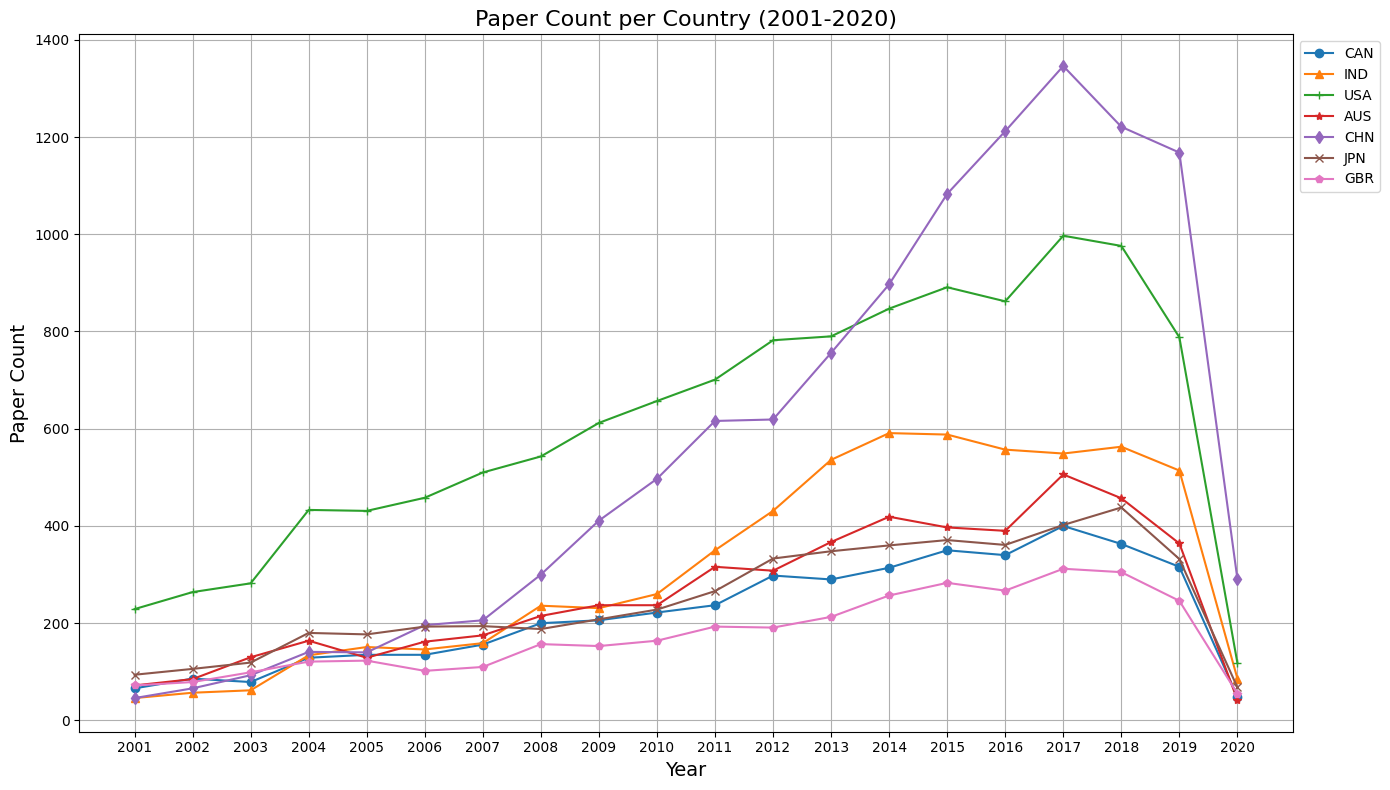

In [11]:
countries = set()
# Extract all countries mentioned across all years
for year in years:
    year_info = df_papers_per_year_by_country[df_papers_per_year_by_country['Year'] == year][:runner_up_count]
    countries.update(year_info['Country'])

# Prepare the data for plotting
plot_data = {country: [] for country in countries}

# print(plot_data)

for year in years:
    year_info = df_papers_per_year_by_country[df_papers_per_year_by_country['Year'] == year]
    year_countries = set(year_info['Country'])

    for country in countries:
        if country in year_countries:
            count = year_info[year_info['Country'] == country]['Count'].values[0]
        else:
            # Fetch data from the dictionary if not in top 5
            count = papers_per_year_by_country.get((year, country), 0)  # Default to 0 if not found
        plot_data[country].append(count)

def yield_markers():
    markers = ['o', '^', '+', '*', 'd', 'x', 'p']
    for marker in markers:
        yield marker

marker = yield_markers()
# Plotting
plt.figure(figsize=(14, 8))

for country, counts in plot_data.items():
    plt.plot(years, counts, label=country, marker=next(marker))

plt.title('Paper Count per Country (2001-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Paper Count', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

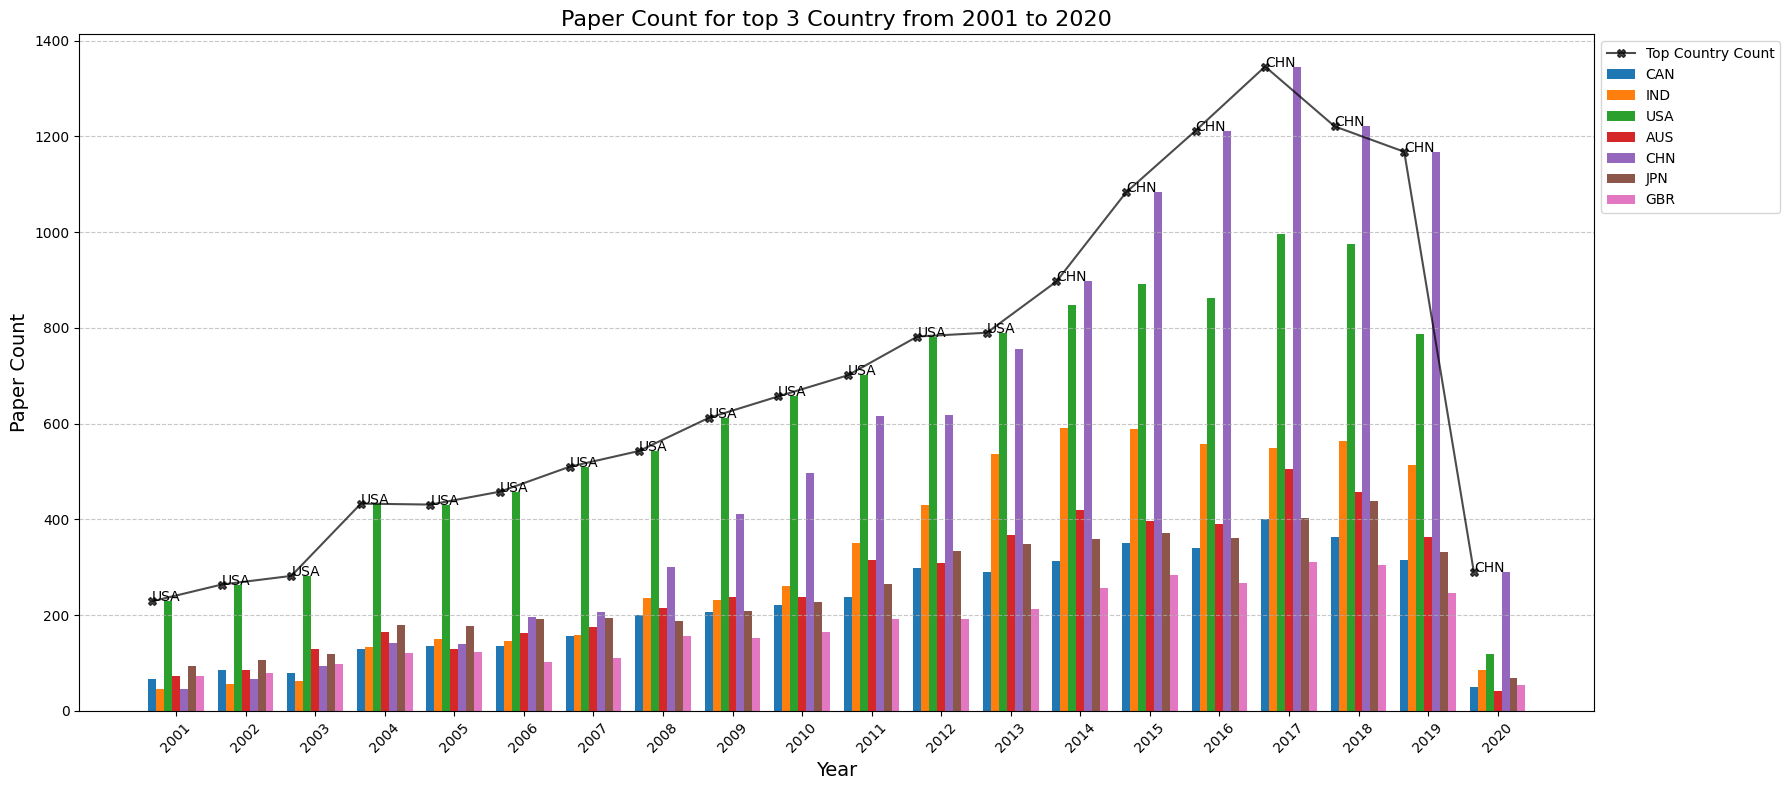

In [13]:
data = [plot_data[country] for country in countries]
# Plotting
x = np.arange(len(years))  # The label locations
width = 0.8 / len(countries)  # The width of the bars

# Create figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plotting bar charts for each country
for i, country in enumerate(countries):
    ax.bar(x + i * width, plot_data[country], width, label=country)

# Annotating the plot
for i, label in enumerate(df_comparison['Median']):
    ax.annotate(
        df_comparison['Top Country'][i],
        (df_comparison['Year'][i], df_comparison['Top Country Count'][i])
    )

# Adding line plot for "Top Country Count"
ax.plot(
    df_comparison['Year'],
    df_comparison['Top Country Count'],
    label='Top Country Count',
    marker='X',
    linestyle='-',
    color='black',
    alpha=0.7
)

# Setting labels, title, and legend
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Paper Count', fontsize=14)
ax.set_title('Paper Count for top 3 Country from 2001 to 2020', fontsize=16)
ax.set_xticks(x + width * (len(countries) - 1) / 2)
ax.set_xticklabels(years, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Adding gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Finding Countries Below median.

In [42]:
# # median = df_comparison['Median']
# plt.plot(year,median, marker='x')
# plt.xticks(rotation=90)
# plt.show()
greater_median_count = []
below_median_cont = []

for i,year in enumerate(years):
    year_info = df_papers_per_year_by_country[df_papers_per_year_by_country['Year'] == year]
    _total_count =  len(year_info)
    year_info = year_info[year_info['Count'] >= median[i]]
    _greater_count = len(year_info)
    greater_median_count.append(_greater_count)
    below_median_cont.append(_total_count - _greater_count)

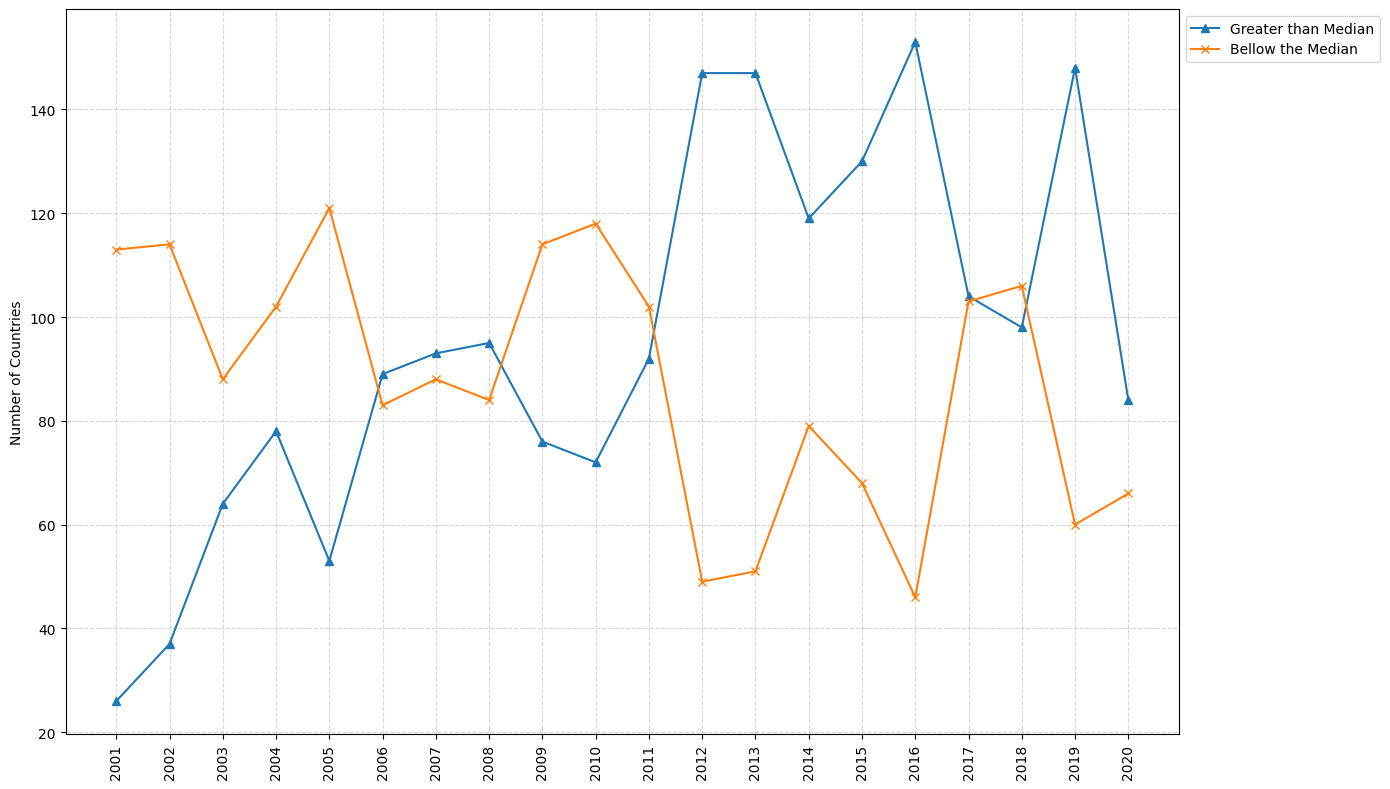

In [53]:
plt.figure(figsize=(14, 8))
plt.plot(years, greater_median_count, label='Greater than Median', marker='^' )
plt.plot(years, below_median_cont, label='Bellow the Median', marker='x')
plt.xticks(rotation=90)
plt.ylabel('Number of Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Calculate the average number of papers published by each country each year.

In [ ]:
def calculate_average_papers_per_country():
    global papers_per_year_by_country
    total_papers_by_country = {}
    total_years_by_country = {}

    # Aggregate the total number of papers and years for each country
    for year, country_data in papers_per_year_by_country.items():
        for country, paper_count in country_data.items():
            if country not in total_papers_by_country:
                total_papers_by_country[country] = 0
                total_years_by_country[country] = 0
            total_papers_by_country[country] += paper_count
            total_years_by_country[country] += 1

    # Calculate the average
    average_papers_by_country = {
        country: total_papers_by_country[country] / total_years_by_country[country]
        for country in total_papers_by_country
    }

    return average_papers_by_country

average_papers_by_country = calculate_average_papers_per_country()

In [ ]:
for country in average_papers_by_country:
    print(f"country : {country}, average papers published : {average_papers_by_country[country]}")

country : AUS, average papers published : 258.6
country : CAN, average papers published : 218.55
country : NZL, average papers published : 105.2
country : KEN, average papers published : 68.6
country : NGA, average papers published : 131.55
country : GNQ, average papers published : 1.6923076923076923
country : BRA, average papers published : 216.75
country : SVK, average papers published : 11.157894736842104
country : IND, average papers published : 312.35
country : NLD, average papers published : 117.55
country : IRN, average papers published : 176.25
country : PAK, average papers published : 83.3
country : MNG, average papers published : 6.947368421052632
country : RUS, average papers published : 73.6
country : KOR, average papers published : 91.6
country : ETH, average papers published : 57.7
country : ZAF, average papers published : 157.95
country : CHN, average papers published : 565.25
country : EGY, average papers published : 43.3
country : PRI, average papers published : 10.5
c

In [ ]:
# Convert dictionary to list of records
data = [{"Country": country, "Average Papers": avg} for country, avg in average_papers_by_country.items()]

# Create DataFrame
df = pd.DataFrame(data)
# Sort the DataFrame by 'Average Papers' in descending order
df_sorted = df.sort_values(by="Average Papers", ascending=False)
# Reset index for cleaner output (optional)
df_sorted = df_sorted.reset_index(drop=True)
# country_name = "USA"
# row = df_sorted.loc[df_sorted["Country"] == country_name]
# print(row)

print(df_sorted)

    Country  Average Papers
0       USA          608.55
1       CHN          565.25
2       IND          312.35
3       AUS          258.60
4       JPN          248.30
..      ...             ...
232     ATG            1.00
233     NRU            1.00
234     VAT            1.00
235     CXR            1.00
236     AND            1.00

[237 rows x 2 columns]


### Year Over Year Growth by country

In [ ]:
# Sort the years
sorted_years = sorted(papers_per_year_by_country.keys())

# Prepare a DataFrame to store YoY growth
growth_data = []

# Iterate over pairs of consecutive years
for i in range(1, len(sorted_years)):
    current_year = sorted_years[i]
    previous_year = sorted_years[i - 1]

    # Get country data for the current and previous year
    current_data = papers_per_year_by_country[current_year]
    previous_data = papers_per_year_by_country[previous_year]

    # Get the union of countries across both years
    all_countries = set(current_data.keys()).union(previous_data.keys())
    for country in all_countries:
        # Get counts (default to 0 if the country is missing for a year)
        current_count = current_data.get(country, 0)
        previous_count = previous_data.get(country, 0)

        # Calculate YoY growth (handle division by zero)
        if previous_count == 0:
            yoy_growth = None  # Undefined growth if no data in the previous year
        else:
            yoy_growth = ((current_count - previous_count) / previous_count) * 100

        # Append data for the country
        growth_data.append({
            "Country": country,
            "Year": current_year,
            "YoY Growth (%)": yoy_growth
        })

# Convert to DataFrame for better readability
growth_df = pd.DataFrame(growth_data)
print(growth_df.to_markdown())


GUM yoy : None year : 2020
GUM yoy : 0.0 year : 2020
GUM yoy : 200.0 year : 2020
GUM yoy : -33.33333333333333 year : 2020
GUM yoy : -100.0 year : 2020
GUM yoy : None year : 2020
GUM yoy : -50.0 year : 2020
GUM yoy : 100.0 year : 2020
GUM yoy : -100.0 year : 2020
GUM yoy : None year : 2020
GUM yoy : -100.0 year : 2020
GUM yoy : None year : 2020
GUM yoy : 0.0 year : 2020
GUM yoy : 0.0 year : 2020
GUM yoy : 100.0 year : 2020
GUM yoy : 50.0 year : 2020
GUM yoy : -66.66666666666666 year : 2020
GUM yoy : 50.0 year : 2020
GUM yoy : -100.0 year : 2020
|      | Country   |   Year |   YoY Growth (%) |
|-----:|:----------|-------:|-----------------:|
|    0 | GUM       |   2002 |       nan        |
|    1 | GLP       |   2002 |      -100        |
|    2 | VIR       |   2002 |      -100        |
|    3 | IRN       |   2002 |        10        |
|    4 | PRT       |   2002 |       120        |
|    5 | BRA       |   2002 |        20.9302   |
|    6 | BEL       |   2002 |        41.6667   |
|    7 | 

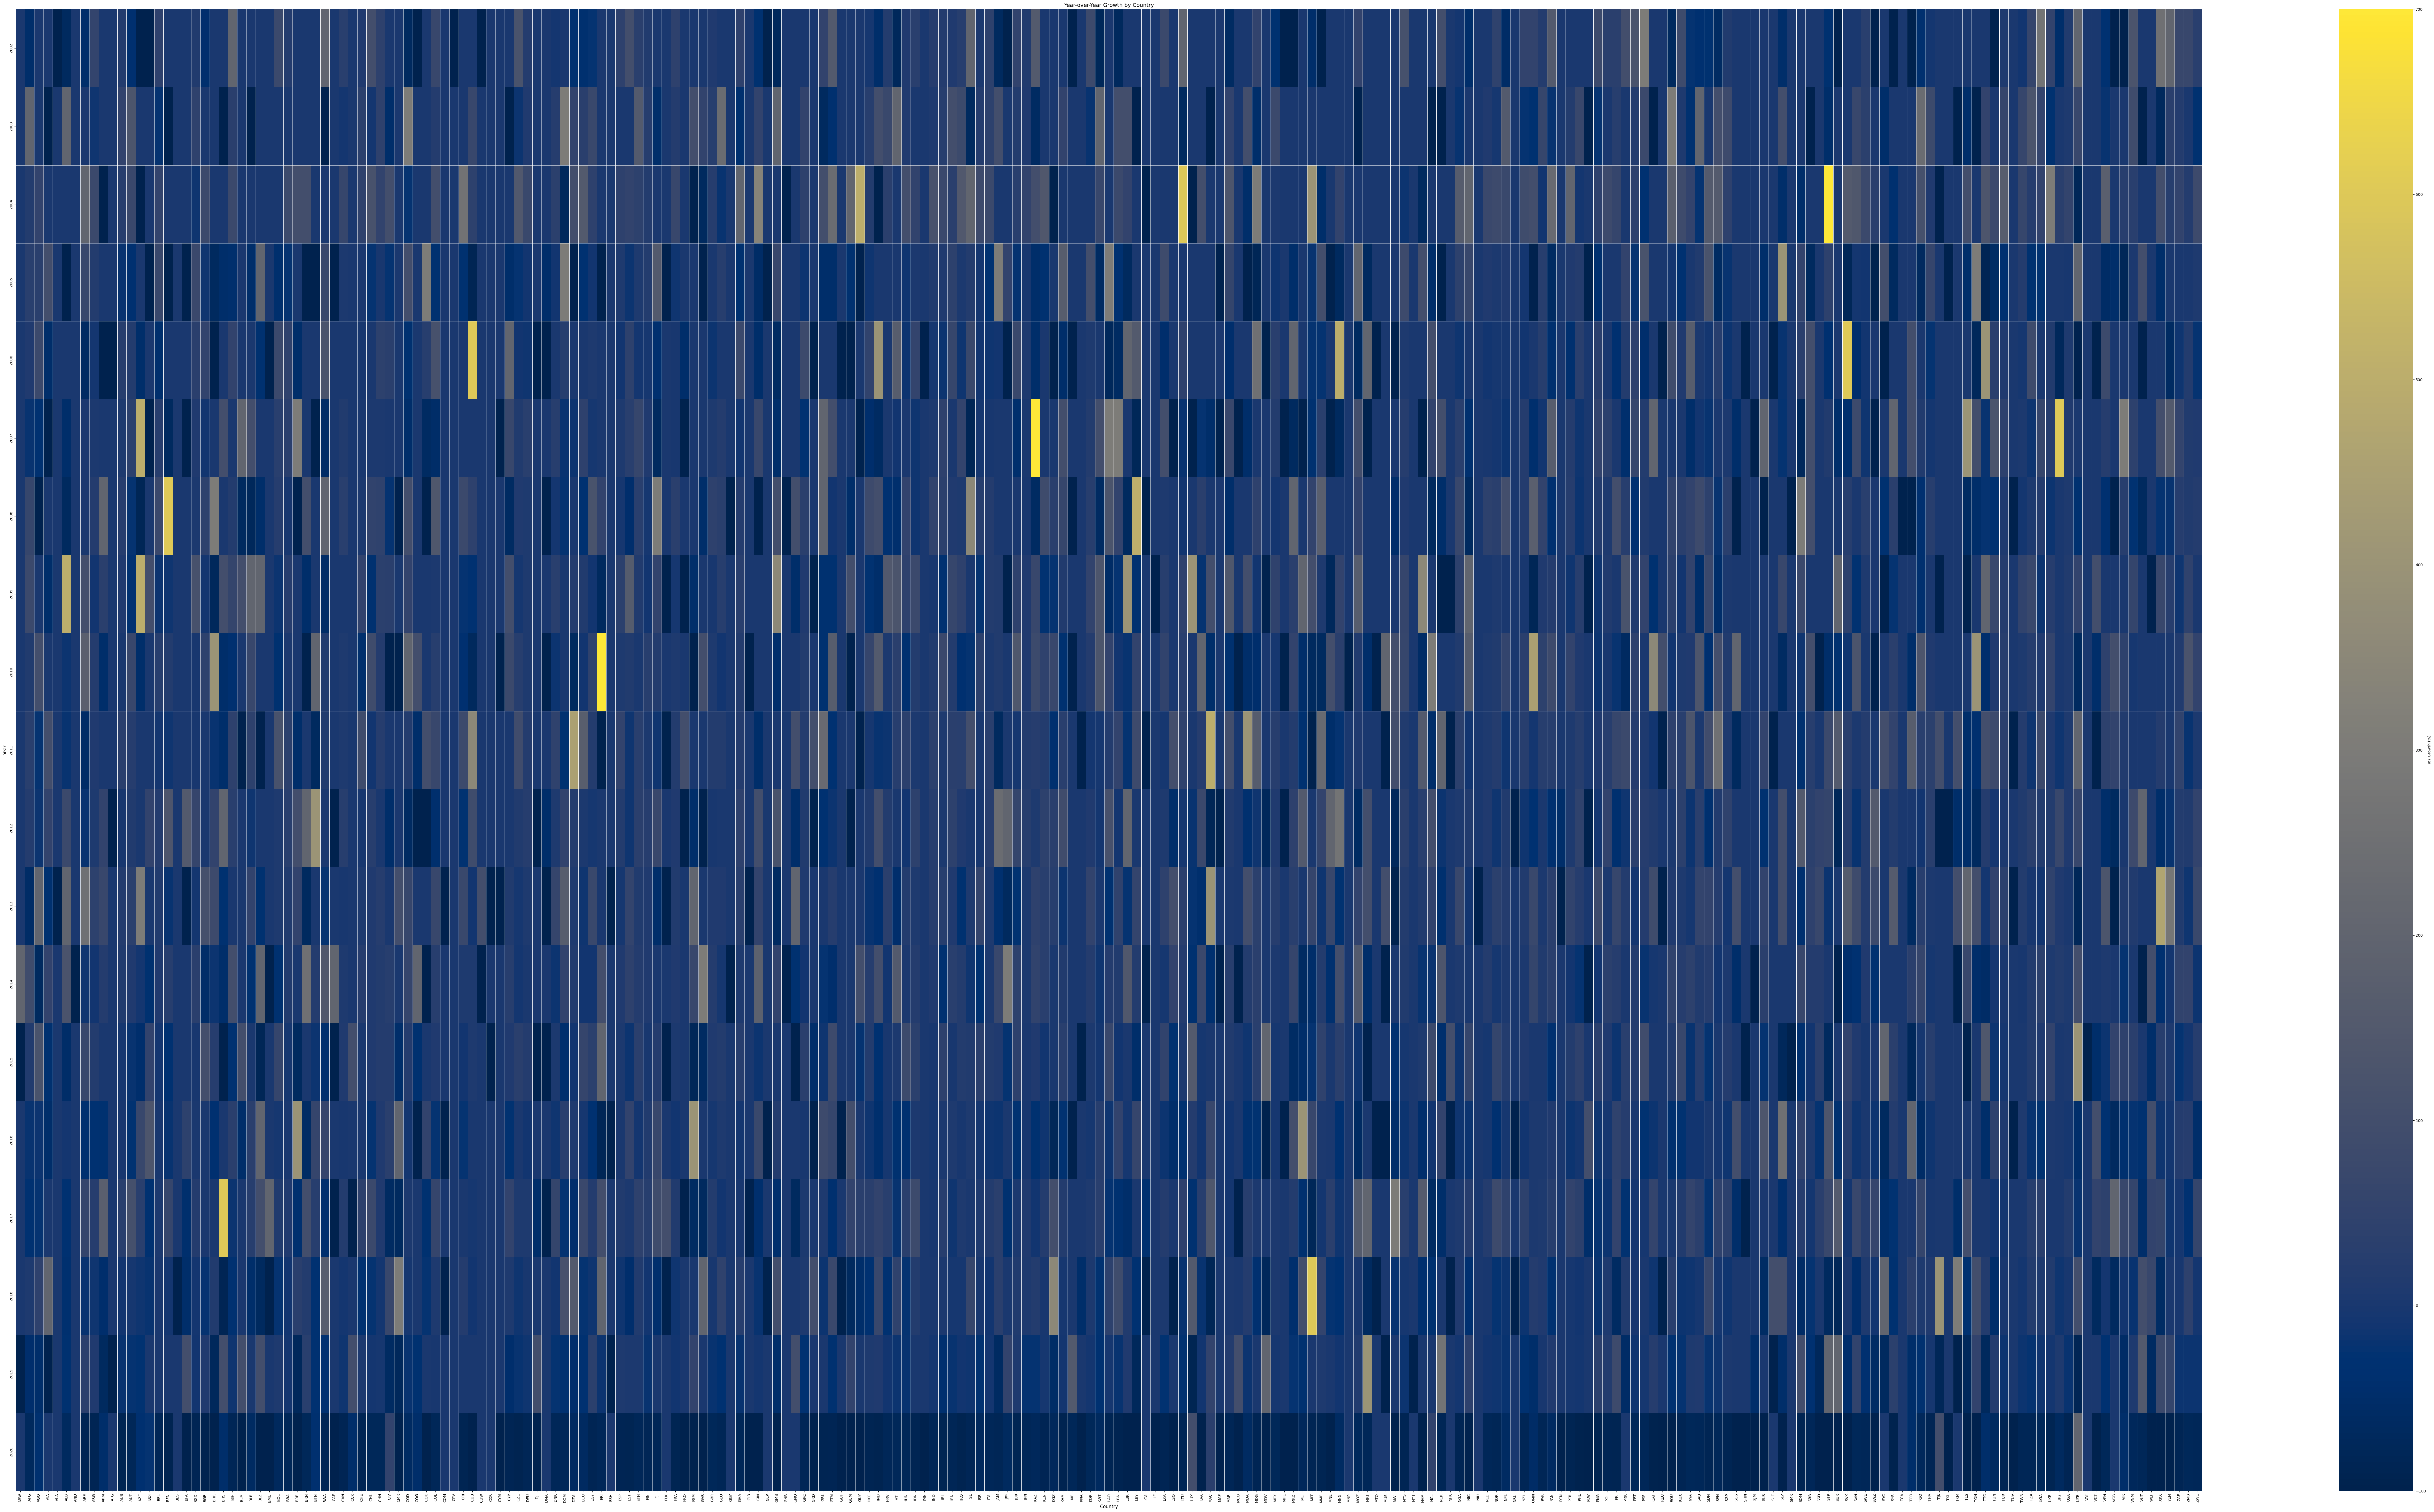

In [ ]:
# Pivot the DataFrame for heatmap
heatmap_data = growth_df.pivot(index="Year", columns="Country", values="YoY Growth (%)").fillna(0)

# Plot heatmap
plt.figure(figsize=(100, 55))
sns.heatmap(
    heatmap_data,
    annot=False,      # Show actual YoY growth values
    fmt=".2f",       # Format as floating-point with 2 decimals
    cmap="cividis", # Color scheme for the heatmap
    cbar_kws={'label': 'YoY Growth (%)'},  # Label for color bar
    linewidths=0.5   # Line width between cells
)

# Add title and labels
plt.title("Year-over-Year Growth by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.savefig('yoy_by_year_and_country.pdf', bbox_inches='tight')
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Determine the overall growth pattern for each country
summary_positive = growth_df.groupby("Country")["YoY Growth (%)"].agg(
    most_growth=lambda x: x.max(),  # Max growth rate
).reset_index()

# Sort for top and bottom countries
top_10_most_growth = summary_positive.sort_values("most_growth", ascending=False).head(20)
# bottom_10_negative_growth = summary.sort_values("most_negative", ascending=True).head(10)

# Display results
print("Top 10 Countries with Most Growth:")
print(top_10_most_growth)


# Determine the overall growth pattern for each country
summary_negative = growth_df.groupby("Country")["YoY Growth (%)"].agg(
    negative_growth=lambda x: x.min()  # Min growth rate
).reset_index()

# Sort for top and bottom countries
bottom_10_most_growth = summary_negative.sort_values("negative_growth", ascending=True).head(20)
# bottom_10_negative_growth = summary.sort_values("most_negative", ascending=True).head(10)

# Display results
print("Bottom 10 Countries Growth:")
print(bottom_10_most_growth)


Top 10 Countries with Most Growth:
    Country  most_growth
63      ERI   700.000000
196     STP   700.000000
110     KAZ   700.000000
126     LTU   600.000000
221     URY   600.000000
140     MLT   600.000000
198     SVK   600.000000
22      BHS   600.000000
16      BEN   600.000000
49      CUB   600.000000
5       ALB   500.000000
91      GUY   500.000000
121     LBY   500.000000
13      AZE   500.000000
129     MAC   500.000000
143     MNG   500.000000
232     XKX   466.666667
60      DZA   450.000000
164     OMN   450.000000
73      FSM   400.000000
Bottom 10 Countries Growth:
    Country  negative_growth
0       ABW           -100.0
170     PLW           -100.0
107     JEY           -100.0
177     QAT           -100.0
178     REU           -100.0
186     SGS           -100.0
187     SHN           -100.0
98      IMN           -100.0
188     SJM           -100.0
189     SLB           -100.0
190     SLE           -100.0
93      HND           -100.0
91      GUY           -100.0
90    

In [ ]:
# Replace 'None' with NaN for better handling
growth_df["YoY Growth (%)"] = growth_df["YoY Growth (%)"].replace({None: np.nan})

# Find the country with the most growth each year
most_growth_each_year = growth_df.loc[growth_df.groupby("Year")["YoY Growth (%)"].idxmax()]

# Find the country with the least growth each year
least_growth_each_year = growth_df.loc[growth_df.groupby("Year")["YoY Growth (%)"].idxmin()]

# Display results
print("Country with the most growth each year:")
print(most_growth_each_year[["Year", "Country", "YoY Growth (%)"]].to_markdown())

print("\nCountry with the least growth each year:")
print(least_growth_each_year[["Year", "Country", "YoY Growth (%)"]].to_markdown())

Country with the most growth each year:
|      |   Year | Country   |   YoY Growth (%) |
|-----:|-------:|:----------|-----------------:|
|  160 |   2002 | PSE       |          300     |
|  180 |   2003 | COD       |          300     |
|  476 |   2004 | STP       |          700     |
|  637 |   2005 | SLV       |          400     |
|  789 |   2006 | CUB       |          600     |
| 1026 |   2007 | KAZ       |          700     |
| 1277 |   2008 | BEN       |          600     |
| 1375 |   2009 | AZE       |          500     |
| 1542 |   2010 | ERI       |          700     |
| 1906 |   2011 | MAC       |          500     |
| 2054 |   2012 | BTN       |          400     |
| 2224 |   2013 | XKX       |          466.667 |
| 2450 |   2014 | GAB       |          300     |
| 2666 |   2015 | UZB       |          400     |
| 2834 |   2016 | BRB       |          400     |
| 3028 |   2017 | BHS       |          600     |
| 3322 |   2018 | MLT       |          600     |
| 3431 |   2019 | MRT       |

### Mean year over year grouth by year
### Mean year over year growth of a country
### find year by year growth is bellow average or above average.
### Year over year stair growth graph.
### Bubble plot
### Connected scatter plot
### Stem plot